In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
spotify_songs = pd.read_csv('spotify_songs_bahia.csv', delimiter=',')
print(spotify_songs)
print(spotify_songs.columns)

                        ts platform  ms_played conn_country        ip_addr  \
0     2025-07-01T11:18:37Z  windows       5658           BR  170.85.20.197   
1     2025-07-01T11:23:39Z  windows     296006           BR  170.85.20.197   
2     2025-07-01T11:27:20Z  windows     220497           BR  170.85.20.197   
3     2025-07-01T11:31:17Z  windows     236646           BR  170.85.20.197   
4     2025-07-01T11:35:18Z  windows     240315           BR  170.85.20.197   
...                    ...      ...        ...          ...            ...   
6184  2026-01-29T19:13:50Z      osx     105619           BR  170.85.18.201   
6185  2026-01-29T19:16:46Z      osx     177427           BR  170.85.18.201   
6186  2026-01-29T19:21:20Z      osx     276200           BR  170.85.18.201   
6187  2026-01-29T19:24:14Z      osx     175373           BR  170.85.18.201   
6188  2026-01-29T19:26:57Z      osx     165000           BR  170.85.18.201   

        master_metadata_track_name master_metadata_album_artist

In [5]:
df_inteiro = spotify_songs.copy()

df = df_inteiro[['master_metadata_album_album_name', 'ms_played']]

df_new = df.groupby('master_metadata_album_album_name').sum('ms_played')

print(df_new)

                                                    ms_played
master_metadata_album_album_name                             
"4"                                                    218849
"Krig-Ha, Bandolo"                                     231240
(II)                                                   453972
(What's The Story) Morning Glory?                     4591285
1,000 Opera Singers Working in Starbucks (Radio...     424366
...                                                       ...
Этажи                                                  141395
תסלחי לי                                                44111
…And Justice for All                                  4015368
アイオライト/蒼い炎                                             241749
ペルソナ4 ダンシング・オールナイト オリジナル・サウンドトラック                      317859

[1177 rows x 1 columns]


In [6]:
df_new = df_new.sort_values(by='ms_played', ascending=False)

# Transforma o número 15245256 em "15.245.256"
df_new['ms_played_formatado'] = df_new['ms_played'].apply(lambda x: f"{x:,.0f}".replace(",", "."))

# Criando a coluna de minutos
df_new['minutos'] = df_new['ms_played'] / 60000

# Criando a coluna de horas
df_new['horas'] = df_new['ms_played'] / 3600000

print(df_new.head(5))



                                  ms_played ms_played_formatado     minutos  \
master_metadata_album_album_name                                              
Minutes to Midnight                15245256          15.245.256  254.087600   
American Idiot                     13425085          13.425.085  223.751417   
Silent Alarm                       13039692          13.039.692  217.328200   
The New Abnormal                   12706792          12.706.792  211.779867   
Torches                            12698747          12.698.747  211.645783   

                                     horas  
master_metadata_album_album_name            
Minutes to Midnight               4.234793  
American Idiot                    3.729190  
Silent Alarm                      3.622137  
The New Abnormal                  3.529664  
Torches                           3.527430  


C:\Users\gabrieloliveira-ieg\AppData\Local\Temp\ipykernel_17360\1411447356.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(


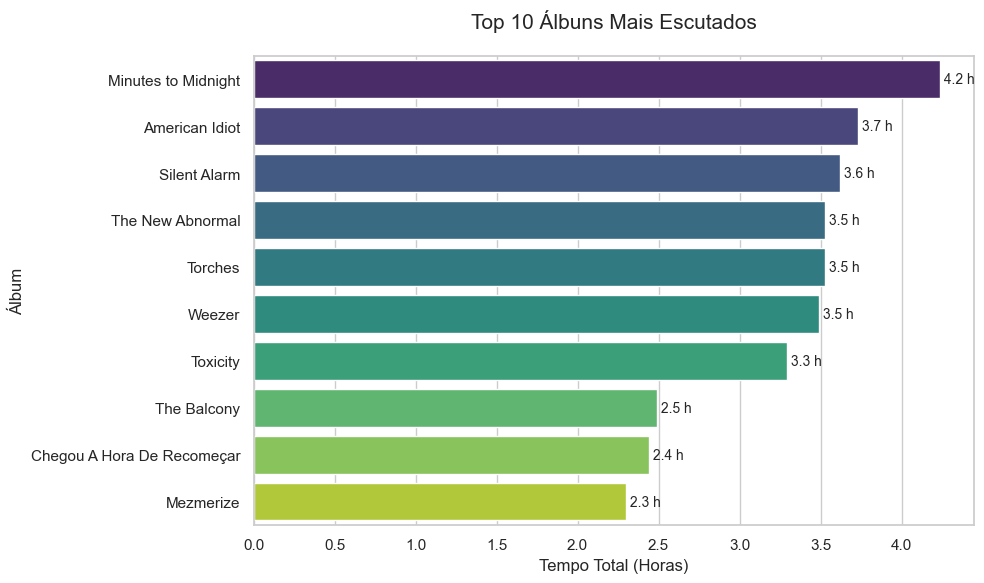

In [7]:
# Configurando o estilo visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Criando o gráfico de barras horizontais
# Pegando apenas os top 10 para não poluir o gráfico
top_albuns = df_new.head(10)

grafico = sns.barplot(
    data=top_albuns,
    x='horas', 
    y='master_metadata_album_album_name', 
    palette='viridis'
)

# Ajustando títulos e labels
plt.title('Top 10 Álbuns Mais Escutados', fontsize=15, pad=20)
plt.xlabel('Tempo Total (Horas)', fontsize=12)
plt.ylabel('Álbum', fontsize=12)

# Adicionando o valor exato na ponta de cada barra para facilitar a leitura
for i, valor in enumerate(top_albuns['horas']):
    plt.text(valor, i, f' {valor:.1f} h', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [8]:
df = df_inteiro[['genero', 'ms_played']].copy()

df_new = df.groupby('genero').sum('ms_played')
df_new = df_new.sort_values(by='ms_played', ascending=True)

# Criando a coluna de minutos
df_new['minutos'] = df_new['ms_played'] / 60000

# Criando a coluna de horas
df_new['horas'] = df_new['ms_played'] / 3600000

print(df_new.head(5))

           ms_played   minutos     horas
genero                                  
forró              0  0.000000  0.000000
egypt           3600  0.060000  0.001000
israeli        44111  0.735183  0.012253
nightcore      50692  0.844867  0.014081
UK             69568  1.159467  0.019324


C:\Users\gabrieloliveira-ieg\AppData\Local\Temp\ipykernel_17360\2171273427.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(


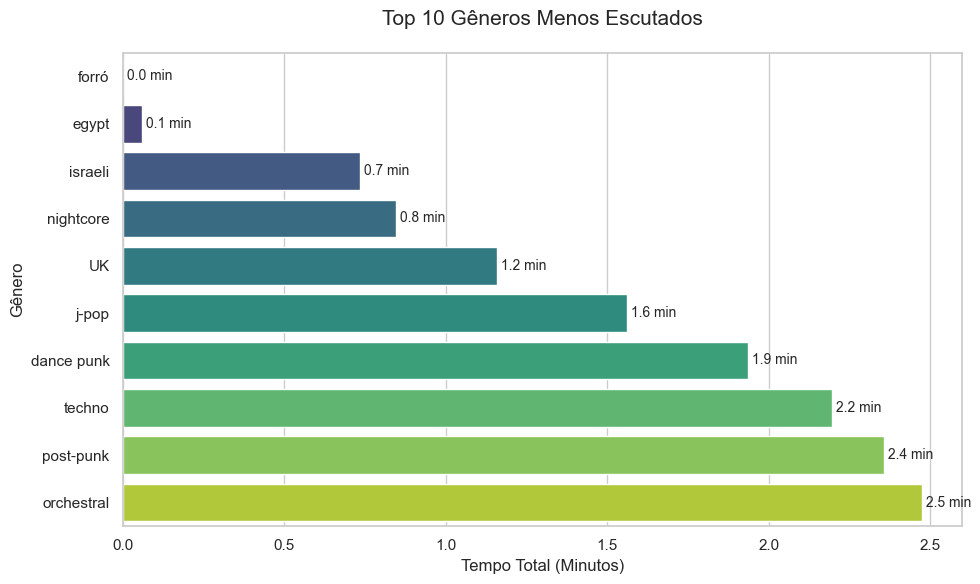

In [9]:
# Configurando o estilo visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Criando o gráfico de barras horizontais
# Pegando apenas os top 10 para não poluir o gráfico
top_albuns = df_new.head(10)

grafico = sns.barplot(
    data=top_albuns,
    x='minutos', 
    y='genero', 
    palette='viridis'
)

# Ajustando títulos e labels
plt.title('Top 10 Gêneros Menos Escutados', fontsize=15, pad=20)
plt.xlabel('Tempo Total (Minutos)', fontsize=12)
plt.ylabel('Gênero', fontsize=12)

# Adicionando o valor exato na ponta de cada barra para facilitar a leitura
for i, valor in enumerate(top_albuns['minutos']):
    plt.text(valor, i, f' {valor:.1f} min', va='center', fontsize=10)

plt.tight_layout()
plt.show()